<a href="https://colab.research.google.com/github/sushily1997/Project_1/blob/main/Capstone_project2_Bangalore_cafe.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**I would like to open a cafe in Bengalore. What you can suggest me?**

- Budget,size,manpower.
  
- Web scrapping,kaggle,data Zomato. 

- Area-max no. of cafe-cuisine-price two people -customer review.

- Area-min of cafe-why less no rest-. 

- Take away,dine in,home delivery, online delivery

About the Data:


address : This feature contains the address of the cafe in Bangalore

name : This feature contains the name of the cafe

online_order : whether online ordering is available in the cafe or not

book_table : table book option available or not

rate : contains the overall rating of the cafe out of 5

votes : contains total number of upvotes for the cafe

location : contains the neighborhood in which the cafe is located

rest_type : cafe type

dish_liked : dishes people liked in the cafe

cuisines : food styles, separated by comma

approx_cost(for two people) : contains the approximate cost of meal for two people

reviews_list : list of tuples containing reviews for the cafe, each tuple consists of two values, rating and review by the customer

listed_in(type) : type of meal

listed_in(city) : contains the neighborhood in which the cafe is located

In [ ]:
# Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import datetime as dt
import plotly.express as px
import matplotlib.pyplot as plt
import missingno as msno
from datetime import timedelta

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

#1. Data Overview

In [ ]:
data=pd.read_csv('/content/drive/MyDrive/cafe_dataset6.csv')
data.head()


In [ ]:
data.info()

In [ ]:
data.sample(10)

#2.DATA CLEANING

In [ ]:
#Replacing cafe with their ratings given as New to NAN 
data['rate'] = data['rate'].replace('NEW',np.NaN)
data['rate'] = data['rate'].replace('-',np.NaN)


In [ ]:
data['rate'] = data.loc[:,'rate'].replace('[ ]','',regex = True)
data['rate'] = data['rate'].astype(str)
data['rate'] = data['rate'].apply(lambda r: r.replace('/5',''))
data['rate'] = data['rate'].apply(lambda r: float(r))

In [ ]:
data.isnull().sum()

In [ ]:
#Using msno graph
msno.bar(data)

#3.Analysis of cafe based on their Online Delivery

In [ ]:
print("No. of cafe with online delivery:")
(data.online_order == 'Yes').sum()

In [ ]:
print("No. of cafe which does not deliver online:")
(data.online_order == 'No').sum()

In [ ]:
data.name.count()

In [ ]:
sns.countplot(x=data['online_order'])
fig = plt.gcf()
fig.set_size_inches(6,6)
plt.title('cafe delivering online or Not')

In [ ]:
sns.countplot(x=data['online_order'], hue = data['listed_in(type)'])
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.title('Type of cafe delivering online or Not')

In [ ]:
#is online delivery available?
colors  = ("darkorange", "green")
explodes = [0.5, 0.5]

data["online_order"].value_counts(sort=False).plot.pie(colors=colors,
                                                 textprops={'fontsize': 12}, 
                                                 autopct = '%4.1f',
                                                 startangle= 90, 
                                                 radius =2, 
                                                 rotatelabels=True,
                                                 shadow = True) 


#Analysis of cafe based on their Table booking facility

In [ ]:
print("No. of cafe with table booking facility:")
(data.book_table == 'Yes').sum()

In [ ]:
print("No. of cafe with table booking facility:")
(data.book_table == 'No').sum()

In [ ]:
sns.countplot(x=data['book_table'])
fig = plt.gcf()
fig.set_size_inches(6,6)
plt.title('cafe providing Table booking facility:')

In [ ]:
sns.countplot(x=data['book_table'],hue = data['listed_in(type)'])
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.title('Type Of cafe providing Table booking facility:')

In [ ]:
#is book table available?
colors  = ("darkorange", "green")
explodes = [0.5, 0.5]

data["book_table"].value_counts(sort=False).plot.pie(colors=colors,
                                                 textprops={'fontsize': 12}, 
                                                 autopct = '%4.1f',
                                                 startangle= 90, 
                                                 radius =2, 
                                                 rotatelabels=True,
                                                 shadow = True) 

#Analysis of cafe based on their Ratings

In [ ]:
print("All unique cafe ratings:")
data.rate.unique()

In [ ]:
print("no. of cafe between 1.5 and 2 rating:")
((data.rate>=1.5) & (data.rate<2)).sum()

In [ ]:
print("no. of cafe between 2.5 and 3 rating:")
((data.rate>=2.5) & (data.rate<3)).sum()

In [ ]:
print("no. of cafe between 2 and 2.5 rating:")
((data.rate>=2) & (data.rate<2.5)).sum()

In [ ]:
print("no. of cafe between 3.0 and 3.5 rating:")
((data.rate>=3.0) & (data.rate<3.5)).sum()

In [ ]:
print("no. of cafe between 3.5 and 4 rating:")
((data.rate>=3.5) & (data.rate<4)).sum()

In [ ]:
print("no. of cafe between 4 and 4.5 rating:")
((data.rate>=4) & (data.rate<4.5)).sum()

In [ ]:
print("no. of cafe between 4.5 and 5 rating:")
((data.rate>=4.5) & (data.rate<5)).sum()

In [ ]:
slices=[((data.rate>=1.5) & (data.rate<2)).sum(),
        ((data.rate>=2) & (data.rate<2.5)).sum(),
        ((data.rate>=2.5) & (data.rate<3)).sum(),
        ((data.rate>=3.0) & (data.rate<3.5)).sum(),
        ((data.rate>=3.5) & (data.rate<4)).sum(),
        ((data.rate>=4) & (data.rate<4.5)).sum(),
        ((data.rate>=4.5) & (data.rate<5)).sum()
          ]
labels=['1.5-2','2-2.5','2.5-3','3-3.5','3.5-4','4-4.5','4.5-5']
colors = ['#3333cc','#ffff1a','#ff3333','#c2c2d6','#6699ff','#c4ff4d']
plt.pie(slices,colors=colors, labels=labels, autopct='%1.0f%%', pctdistance=.5, labeldistance=1.2,shadow=True)
fig = plt.gcf()
plt.title("Percentage of cafe according to their ratings", bbox={'facecolor':'1', 'pad':5})

fig.set_size_inches(10,10)
plt.show()

Analysis of cafe based on their table booking facility and how rating is related to it

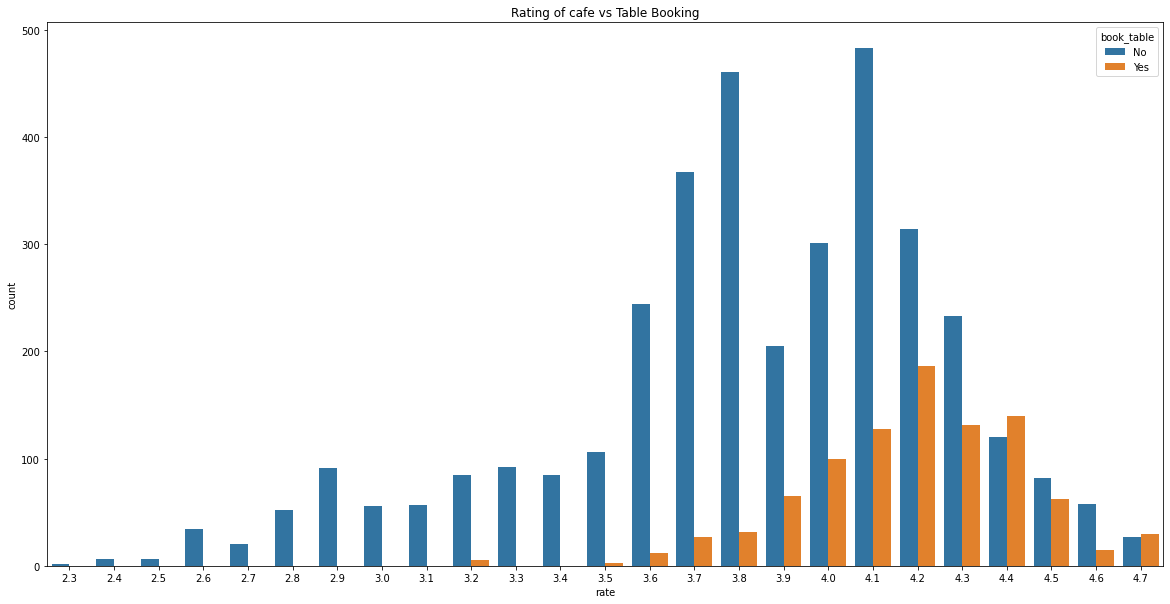

In [ ]:
plt.figure(figsize=(20,10))
ax = sns.countplot(x='rate',hue='book_table',data=data)
plt.title('Rating of cafe vs Table Booking')
plt.show()

Analysis of cafe based on their online order and how rating is related to it

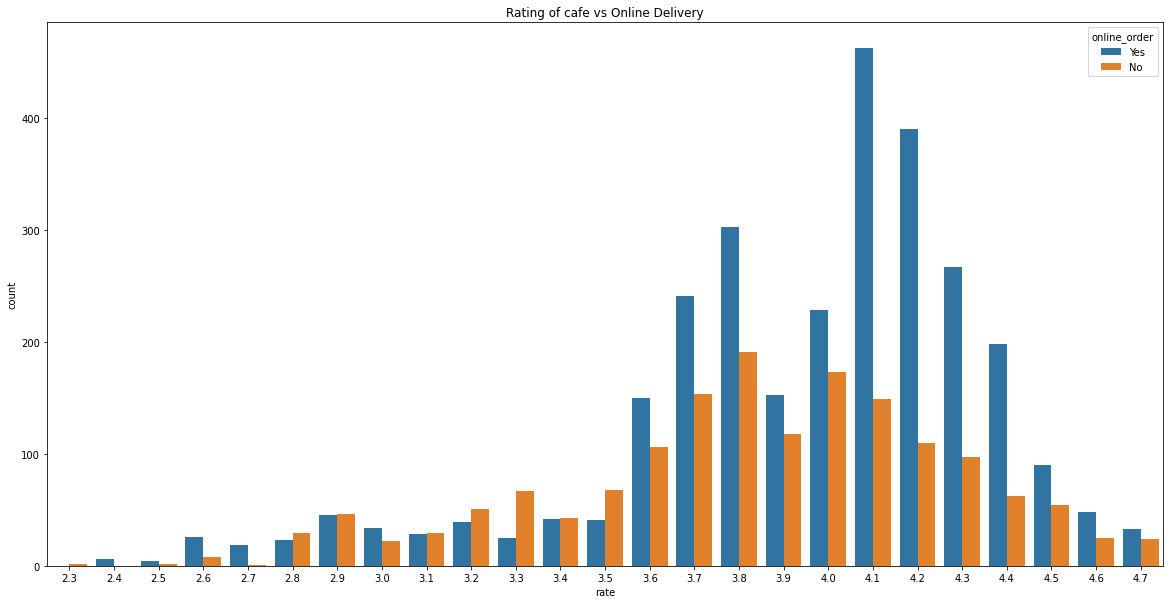

In [ ]:
plt.figure(figsize=(20,10))
ax = sns.countplot(x='rate',hue='online_order',data=data)
plt.title('Rating of cafe vs Online Delivery')
plt.show()

It is Clearly visible that table Booking doesnot affect much to a cafe ratings in comparison to online delivery. People tend to prefer order online since they can get various offers from it. That's why online delivery is more important for cafe in bangalore to flourish

#Analysis of cafe based on their Location

In [ ]:
print("All unique locations of cafe in Bangalore")
data.location.unique()

All unique locations of cafe in Bangalore


array(['Banashankari', 'Basavanagudi', 'Jayanagar', 'Kumaraswamy Layout',
       'JP Nagar', 'Bannerghatta Road', 'BTM', 'Shanti Nagar',
       'Richmond Road', 'Wilson Garden', 'Bellandur', 'Sarjapur Road',
       'Marathahalli', 'HSR', 'Church Street', 'MG Road', 'Brigade Road',
       'Residency Road', 'St. Marks Road', 'Lavelle Road', 'Ulsoor',
       'Infantry Road', 'Commercial Street', 'Shivajinagar',
       'Cunningham Road', 'Vasanth Nagar', 'City Market',
       'Race Course Road', 'Indiranagar', 'Frazer Town',
       'Koramangala 7th Block', 'Koramangala 8th Block', 'Brookefield',
       'Whitefield', 'ITPL Main Road, Whitefield',
       'Koramangala 2nd Block', 'Koramangala 5th Block',
       'Koramangala 4th Block', 'Koramangala 3rd Block',
       'Koramangala 1st Block', 'Koramangala 6th Block',
       'Electronic City', 'Banaswadi', 'Kammanahalli', 'Bommanahalli',
       'Domlur', 'Jeevan Bhima Nagar', 'Thippasandra', 'Old Airport Road',
       'CV Raman Nagar', 'Old Mad

In [ ]:
print("Count of cafe at unique locations")
locationCount=data['location'].value_counts().sort_values(ascending=True)
locationCount

Count of cafe at unique locations


Nagawara                   1
Old Madras Road            2
Vijay Nagar                2
Sahakara Nagar             2
Kaggadasapura              2
                        ... 
JP Nagar                 204
Jayanagar                234
BTM                      320
Indiranagar              321
Koramangala 5th Block    468
Name: location, Length: 66, dtype: int64

In [ ]:
#lets check max count
print("Maximum number of cafe Present at:")
count_max=max(locationCount)
for x,y in locationCount.items():
    if(y==count_max):
        print(x)

Maximum number of cafe Present at:
Koramangala 5th Block


In [ ]:
#lets check min count
print("minimum number of cafe present at:")
min_count=min(locationCount)
for x,y in locationCount.items():
    if(y==min_count):
        print(x)

minimum number of cafe present at:
Nagawara


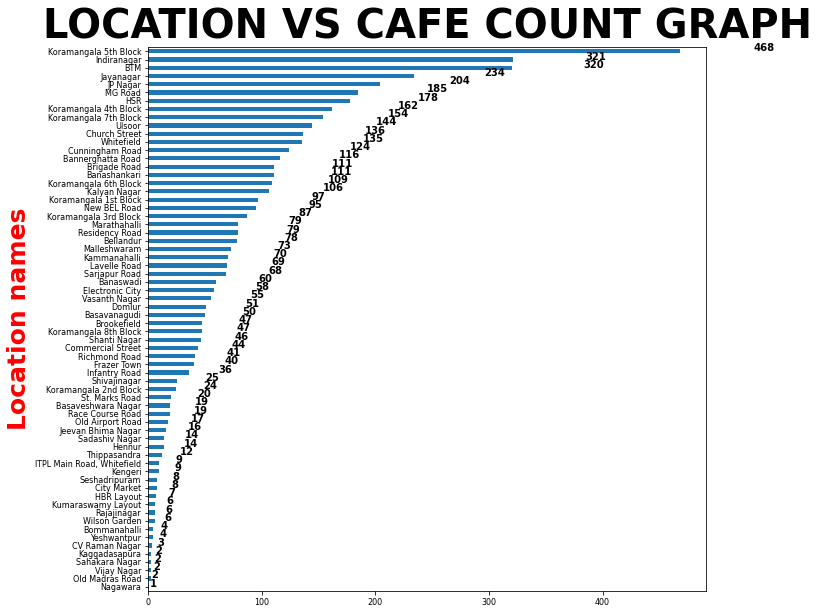

In [ ]:
fig=plt.figure(figsize=(10,10))
locationCount.plot(kind="barh",fontsize=8)
plt.ylabel("Location names",fontsize=25,color="red",fontweight='bold')
plt.title("LOCATION VS CAFE COUNT GRAPH",fontsize=40,color="BLACK",fontweight='bold')
for v in range(len(locationCount)):
    #plt.text(x axis location ,y axis location ,text value ,other parameters......)
    plt.text(v+locationCount[v],v,locationCount[v],fontsize=10,color="BLACK",fontweight='bold')

#Analysis of cafe based on their Dining Type

In [ ]:
print("All different dining type cafe")
data['listed_in(type)'].unique()

All different dining type cafe


array(['Buffet', 'Cafes', nan, 'Delivery', 'Desserts', 'Dine-out',
       'Drinks & nightlife', 'Pubs and bars'], dtype=object)

In [ ]:
print("Count of All different dining type cafe")
cafeTypeCount=data['listed_in(type)'].value_counts().sort_values(ascending=True)
cafeTypeCount

Count of All different dining type cafe


Pubs and bars            9
Buffet                  12
Drinks & nightlife      15
Desserts               318
Dine-out              1134
Delivery              1266
Cafes                 1305
Name: listed_in(type), dtype: int64

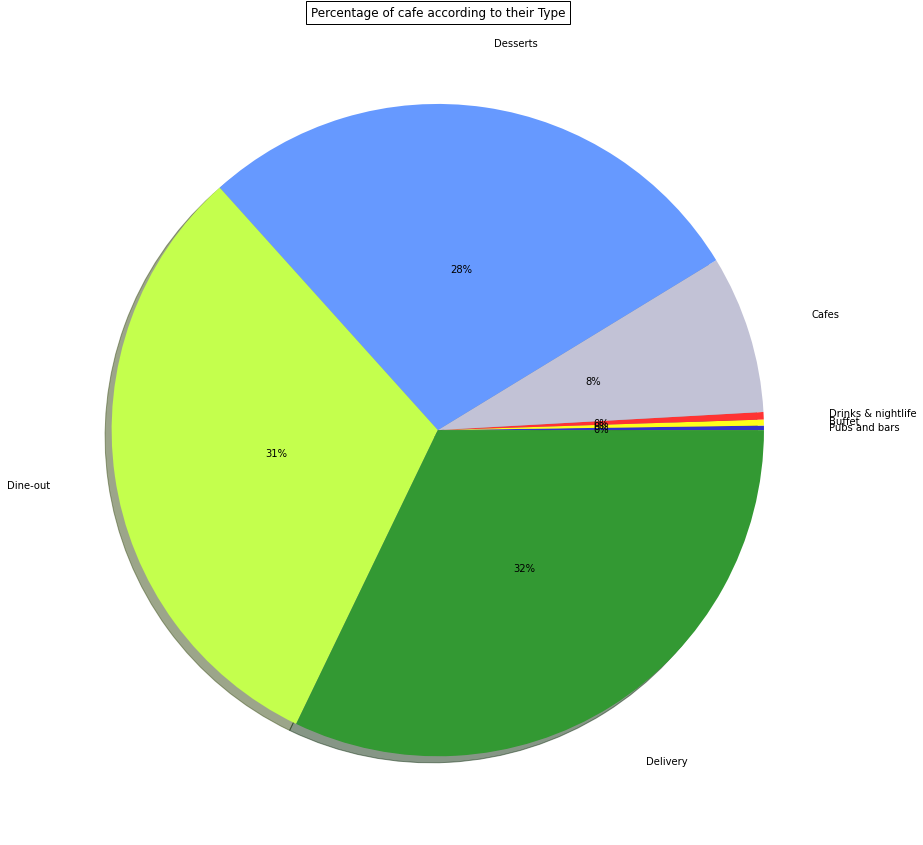

In [ ]:
slices=[cafeTypeCount[0],
        cafeTypeCount[1],
        cafeTypeCount[2],
        cafeTypeCount[3],
        cafeTypeCount[4],
        cafeTypeCount[5],
        cafeTypeCount[6]]
labels=['Pubs and bars','Buffet','Drinks & nightlife','Cafes','Desserts','Dine-out','Delivery ']
colors = ['#3333cc','#ffff1a','#ff3333','#c2c2d6','#6699ff','#c4ff4d','#339933']
plt.pie(slices,colors=colors, labels=labels, autopct='%1.0f%%', pctdistance=.5, labeldistance=1.2,shadow=True)
fig = plt.gcf()
plt.title("Percentage of cafe according to their Type", bbox={'facecolor':'1', 'pad':5})

fig.set_size_inches(15,15)
plt.show()

#Analysis of cafe based on their Subcity Type¶


In [ ]:
CityCount=data['listed_in(city)'].value_counts().sort_values(ascending=True)
CityCount

Electronic City           49
Rajajinagar               53
Marathahalli              61
Bellandur                 62
New BEL Road              64
Sarjapur Road             68
Banashankari              75
Brookefield               80
Whitefield                80
Malleshwaram              88
HSR                      109
Frazer Town              111
Bannerghatta Road        112
Old Airport Road         115
Kammanahalli             115
Kalyan Nagar             119
Basavanagudi             129
Residency Road           144
MG Road                  149
JP Nagar                 150
Lavelle Road             164
Brigade Road             174
Church Street            184
Koramangala 5th Block    194
Indiranagar              205
Jayanagar                212
Koramangala 6th Block    223
Koramangala 7th Block    244
Koramangala 4th Block    255
BTM                      271
Name: listed_in(city), dtype: int64

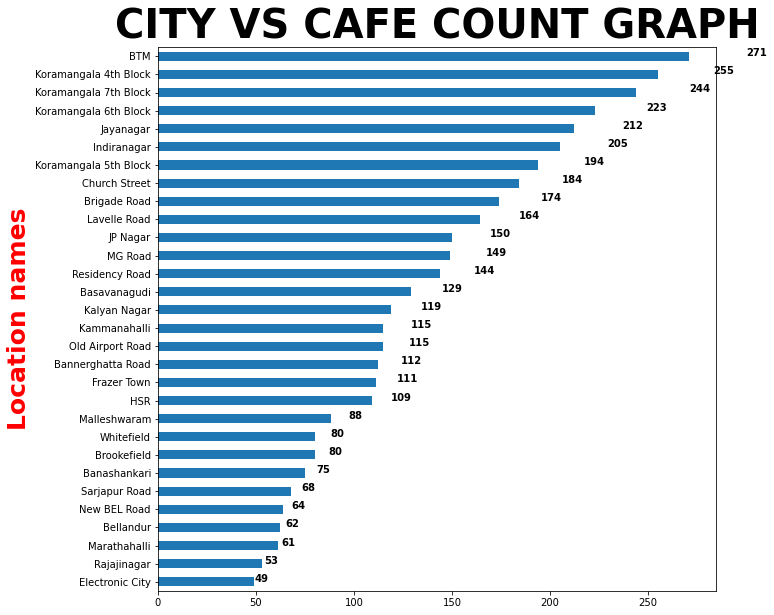

In [ ]:
fig=plt.figure(figsize=(10,10))
CityCount.plot(kind="barh",fontsize=10)
plt.ylabel("Location names",fontsize=25,color="red",fontweight='bold')
plt.title("CITY VS CAFE COUNT GRAPH",fontsize=40,color="BLACK",fontweight='bold')
for v in range(len(CityCount)):
    #plt.text(x axis location ,y axis location ,text value ,other parameters......)
    plt.text(v+CityCount[v],v,CityCount[v],fontsize=10,color="BLACK",fontweight='bold')

Text(0.5, 1.0, 'COST FOR 2 PEOPLE VS CAFE  GRAPH')

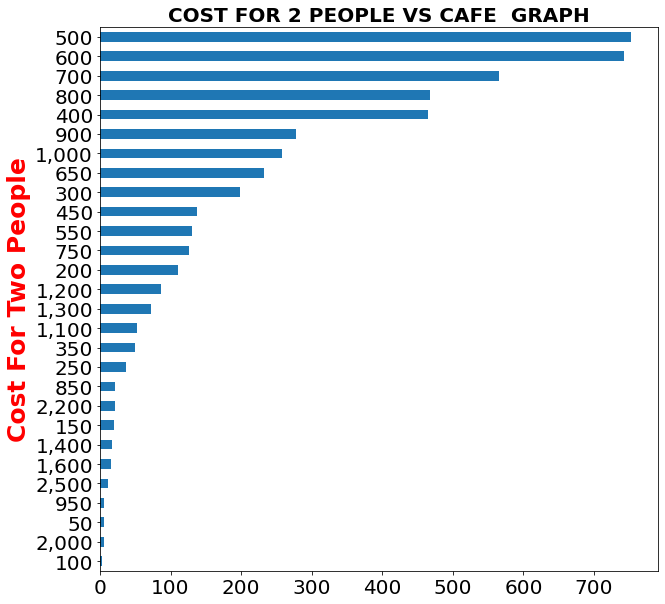

In [ ]:
CostCount=data['approx_cost(for two people)'].value_counts().sort_values(ascending=True)
fig=plt.figure(figsize=(10,10))
CostCount.plot(kind="barh",fontsize=20)
plt.ylabel("Cost For Two People",fontsize=25,color="red",fontweight='bold')
plt.title("COST FOR 2 PEOPLE VS CAFE  GRAPH",fontsize=20,color="BLACK",fontweight='bold')

In [ ]:
data.votes.describe()

count     4947.000000
mean       579.667475
std       1308.495949
min          0.000000
25%         30.000000
50%        124.000000
75%        523.000000
max      14726.000000
Name: votes, dtype: float64

In [ ]:
data[((data.votes>=300)==True) & ((data.rate>=4)==True)].describe()

,rate,votes
count,1609.000000,1609.000000
mean,4.257489,1577.883779
std,0.179953,1933.730565
min,4.000000,306.000000
25%,4.100000,506.000000
50%,4.200000,872.000000
75%,4.400000,1852.000000
max,4.700000,14726.000000


#Analysis of cafe based on their Coffee and FoodType

In [ ]:
print("all different cuisines:")
cuisines = set()
for i in data['cuisines']:
    for j in str(i).split(', '):
        cuisines.add(j)
cuisines

all different cuisines:


{'American',
 'Andhra',
 'Arabian',
 'Asian',
 'BBQ',
 'Bakery',
 'Beverages',
 'Biryani',
 'Burger',
 'Cafe',
 'Chinese',
 'Coffee',
 'Continental',
 'Desserts',
 'European',
 'Fast Food',
 'Finger Food',
 'French',
 'German',
 'Goan',
 'Greek',
 'Healthy Food',
 'Ice Cream',
 'Italian',
 'Japanese',
 'Jewish',
 'Juices',
 'Kashmiri',
 'Lebanese',
 'Mediterranean',
 'Mexican',
 'Middle Eastern',
 'Modern Indian',
 'Momos',
 'Mughlai',
 'North Eastern',
 'North Indian',
 'Parsi',
 'Pizza',
 'Rolls',
 'Salad',
 'Sandwich',
 'South American',
 'South Indian',
 'Spanish',
 'Steak',
 'Street Food',
 'Tea',
 'Tex-Mex',
 'Thai',
 'Turkish',
 'Vegan',
 'Wraps'}

In [ ]:
import plotly.graph_objs as go
values = data['cuisines'].value_counts()[:20]
labels=values.index
text=values.index
fig = go.Figure(data=[go.Pie(values=values,labels=labels,hole=.3)])
fig.update_traces(hoverinfo='label+percent', textinfo='value', textfont_size=20,
                  marker=dict(line=dict(color='#000000', width=3)))
fig.update_layout(title="Most popular cuisines of Bangalore ",
                  titlefont={'size': 30},
                  )
fig.show()

#Get All the North Indian Food Serving cafe

In [ ]:
NorthIndianFoodcafe = data[data['cuisines'].str.contains('North Indian', case=False, regex=True,na=False)]
NorthIndianFoodcafe.head()

,address,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people),listed_in(type),listed_in(city)
13,"146, 50 ft Road, 3rd Phase, 3rd Stage, Near Ka...",The Vintage Cafe,Yes,No,3.0,62,Banashankari,Cafe,"Burgers, Caramel Milkshake, Iced Coffee, Iced Tea","Cafe, French, North Indian",400,Cafes,Banashankari
22,"112, Bull Temple Road,next to more Basavanagud...",Srinathji's Cafe,No,No,3.8,148,Basavanagudi,"Casual Dining, Cafe","Paratha, Sandwich, Chilli Idli, Noodles, Sandw...","North Indian, Cafe, Chinese, Fast Food",550,Cafes,Banashankari
28,"146, 50 ft Road, 3rd Phase, 3rd Stage, Near Ka...",The Vintage Cafe,Yes,No,3.0,62,Banashankari,Cafe,"Burgers, Caramel Milkshake, Iced Coffee, Iced Tea","Cafe, French, North Indian",400,Delivery,Banashankari
30,"112, Bull Temple Road,next to more Basavanagud...",Srinathji's Cafe,No,No,3.8,148,Basavanagudi,"Casual Dining, Cafe","Paratha, Sandwich, Chilli Idli, Noodles, Sandw...","North Indian, Cafe, Chinese, Fast Food",550,Delivery,Banashankari
71,"146, 50 ft Road, 3rd Phase, 3rd Stage, Near Ka...",The Vintage Cafe,Yes,No,3.0,62,Banashankari,Cafe,"Burgers, Caramel Milkshake, Iced Coffee, Iced Tea","Cafe, French, North Indian",400,Dine-out,Banashankari


#Get All the Chinese Food Serving cafe

In [ ]:
ChineseFoodcafe = data[data['cuisines'].str.contains('Chinese|Momos', case=False, regex=True,na=False)]
ChineseFoodcafe.head()

,address,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people),listed_in(type),listed_in(city)
3,"2470, 21 Main Road, 25th Cross, Banashankari, ...",Smacznego,Yes,No,4.2,504,Banashankari,Cafe,"Waffles, Pasta, Coleslaw Sandwich, Choco Waffl...","Cafe, Mexican, Italian, Momos, Beverages",550,Cafes,Banashankari
5,"6th Block, 3rd Stage, Banashankari, Bangalore",The Coffee Shack,Yes,Yes,4.2,164,Banashankari,Cafe,"Coffee, Spaghetti, Pancakes, Nachos, Pasta, Sa...","Cafe, Chinese, Continental, Italian",500,Cafes,Banashankari
9,"241, 4th Floor, 100 Feet Ring Road, Opposite K...",Catch-up-ino,Yes,No,3.9,133,Banashankari,Cafe,"Momos, Mushroom Bruschettas, Jalapeno Cheeseba...","Cafe, Fast Food, Continental, Chinese, Momos",800,Cafes,Banashankari
10,"405, 24th Cross, 9th Main, 2nd Stage, Banashan...",Kirthi's Biryani,Yes,No,3.8,144,Banashankari,Cafe,"Pasta, Gelato, Garlic Bread, Mojito, Nachos, P...","Chinese, Cafe, Italian",700,Cafes,Banashankari
12,"47, 48 &49, 3Rd Floor, 21st Main Road, 2nd Sta...",360 Atoms Restaurant And Cafe,Yes,No,3.1,13,Banashankari,Cafe,NaN,"Cafe, Chinese, Continental, Italian",400,Cafes,Banashankari


#Get All the South Indian Food Serving cafe

In [ ]:
SouthIndianFoodcafe = data[data['cuisines'].str.contains('South Indian', case=False, regex=True,na=False)]
SouthIndianFoodcafe.head()

,address,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people),listed_in(type),listed_in(city)
19,"27th Cross Rd, Banashankari Stage II, Banashan...",Coffee Tindi,Yes,No,3.8,75,Banashankari,"Cafe, Quick Bites",NaN,"Cafe, South Indian",200,Cafes,Banashankari
43,"27th Cross Rd, Banashankari Stage II, Banashan...",Coffee Tindi,Yes,No,3.8,75,Banashankari,"Cafe, Quick Bites",NaN,"Cafe, South Indian",200,Delivery,Banashankari
228,"27th Cross Rd, Banashankari Stage II, Banashan...",Coffee Tindi,Yes,No,3.8,75,Banashankari,"Cafe, Quick Bites",NaN,"Cafe, South Indian",200,Cafes,Basavanagudi
268,"27th Cross Rd, Banashankari Stage II, Banashan...",Coffee Tindi,Yes,No,3.8,75,Banashankari,"Cafe, Quick Bites",NaN,"Cafe, South Indian",200,Delivery,Basavanagudi
336,"95/2, Shobha Lakeview Clubhouse, Margosa Avenu...",Story Time,No,No,3.7,15,Bellandur,"Cafe, Quick Bites",NaN,"North Indian, South Indian, Andhra, Cafe",500,Cafes,Bellandur


#Get All the Italian Food Serving cafe

In [ ]:
ItalianFoodcafe = data[data['cuisines'].str.contains('Italian|Pizza', case=False, regex=True,na=False)]
ItalianFoodcafe.head()

,address,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people),listed_in(type),listed_in(city)
0,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,Buffet,Banashankari
1,"2469, 3rd Floor, 24th Cross, Opposite BDA Comp...",Onesta,Yes,Yes,4.6,2556,Banashankari,"Casual Dining, Cafe","Farmhouse Pizza, Chocolate Banana, Virgin Moji...","Pizza, Cafe, Italian",600,Cafes,Banashankari
2,"1, 30th Main Road, 3rd Stage, Banashankari, Ba...",Penthouse Cafe,Yes,No,4.0,324,Banashankari,Cafe,"Pizza, Mocktails, Coffee, Nachos, Salad, Pasta...","Cafe, Italian, Continental",700,NaN,NaN
3,"2470, 21 Main Road, 25th Cross, Banashankari, ...",Smacznego,Yes,No,4.2,504,Banashankari,Cafe,"Waffles, Pasta, Coleslaw Sandwich, Choco Waffl...","Cafe, Mexican, Italian, Momos, Beverages",550,Cafes,Banashankari
4,"941, 3rd FLOOR, 21st Main, 22nd Cross, Banasha...",Cafe Shuffle,Yes,Yes,4.2,150,Banashankari,Cafe,"Mocktails, Peri Fries, Lasagne, Pizza, Chicken...","Cafe, Italian, Continental",600,Cafes,Banashankari


#Get All the Mexican Food Serving cafe

In [ ]:
MexicanFoodcafe = data[data['cuisines'].str.contains('Mexican', case=False, regex=True,na=False)]
MexicanFoodcafe.head()

,address,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people),listed_in(type),listed_in(city)
0,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,"2470, 21 Main Road, 25th Cross, Banashankari, ...",Smacznego,Yes,No,4.2,504,Banashankari,Cafe,"Waffles, Pasta, Coleslaw Sandwich, Choco Waffl...","Cafe, Mexican, Italian, Momos, Beverages",550,Cafes,Banashankari
7,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,Cafes,Banashankari
29,"2470, 21 Main Road, 25th Cross, Banashankari, ...",Smacznego,Yes,No,4.2,504,Banashankari,Cafe,"Waffles, Pasta, Coleslaw Sandwich, Choco Waffl...","Cafe, Mexican, Italian, Momos, Beverages",550,Delivery,Banashankari
51,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,Delivery,Banashankari


#Get All the American Food Serving cafe

In [ ]:
AmericanFoodcafe = data[data['cuisines'].str.contains('American|Burger', case=False, regex=True,na=False)]
AmericanFoodcafe.head()

,address,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people),listed_in(type),listed_in(city)
11,"504, CJ Venkata Das Road, Padmanabhangar, 2nd ...",T3H Cafe,No,No,3.9,93,Banashankari,Cafe,"Cheese Maggi, Peri Peri Fries, Pasta Arrabiata","Cafe, Italian, American",300,Cafes,Banashankari
27,"2, Old 36, 8th F Main, 3rd Block, Jayanagar, B...",Grazers,Yes,Yes,3.9,291,Jayanagar,Cafe,"Burgers, Panneer Butter Masala, Pasta, Hot Dog...","Cafe, Burger, Continental, Italian, Desserts",650,Delivery,Banashankari
34,"63/2, 8th Main, 18th Cross, 3rd Block, Jayanag...",Java City,Yes,No,2.6,157,Jayanagar,Cafe,"Coffee, Sandwich, Hot Chocolate, Ice Tea, Sand...","Cafe, American, Pizza",450,Delivery,Banashankari
69,"504, CJ Venkata Das Road, Padmanabhangar, 2nd ...",T3H Cafe,No,No,3.9,93,Banashankari,Cafe,"Cheese Maggi, Peri Peri Fries, Pasta Arrabiata","Cafe, Italian, American",300,Dine-out,Banashankari
97,"5th Cross Road, Dollar Layout, 3rd Phase, JP N...",Slate Cafe,Yes,No,4.1,46,JP Nagar,Cafe,"Pasta, Sandwiches","Cafe, Sandwich, Burger",600,Cafes,Bannerghatta Road


#Get All the Mughlai Food Serving cafe

In [ ]:
MughlaiFoodcafe = data[data['cuisines'].str.contains('Mughlai', case=False, regex=True,na=False)]
MughlaiFoodcafe.head()

,address,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people),listed_in(type),listed_in(city)
1270,"Hulimangala Rd, Bengaluru, Karnataka 560100, I...",KA 51 Restocafe,No,No,3.9,39,Electronic City,Cafe,NaN,"Cafe, Mughlai",650,Cafes,Electronic City
1311,"Hulimangala Rd, Bengaluru, Karnataka 560100, I...",KA 51 Restocafe,No,No,3.9,39,Electronic City,Cafe,NaN,"Cafe, Mughlai",650,Dine-out,Electronic City


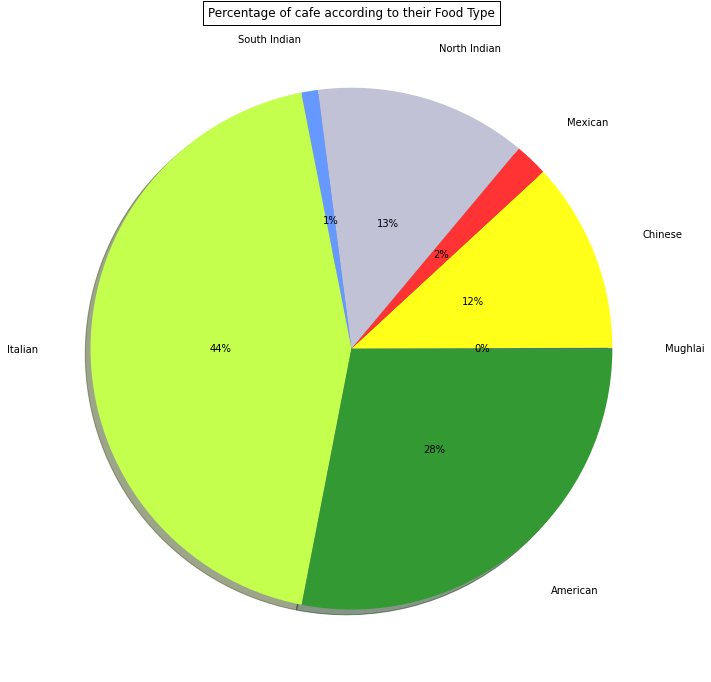

In [ ]:
#pie chart showing % of various Food serving Type cafe
slices=[MughlaiFoodcafe.shape[0],
        ChineseFoodcafe.shape[0],
        MexicanFoodcafe.shape[0],
        NorthIndianFoodcafe.shape[0],
        SouthIndianFoodcafe.shape[0],
        ItalianFoodcafe.shape[0],
        AmericanFoodcafe.shape[0]]
labels=['Mughlai','Chinese','Mexican','North Indian','South Indian','Italian','American']
colors = ['#3333cc','#ffff1a','#ff3333','#c2c2d6','#6699ff','#c4ff4d','#339933']
plt.pie(slices,colors=colors, labels=labels, autopct='%1.0f%%', pctdistance=.5, labeldistance=1.2,shadow=True)
fig = plt.gcf()
plt.title("Percentage of cafe according to their Food Type", bbox={'facecolor':'1', 'pad':5})

fig.set_size_inches(12,12)
plt.show()

#Analysis of cafe Whether Single Cuisine or Multi Cusine

In [ ]:
SingleTypeofcoffeeServing = data[data['cuisines'].str.contains(',', case=False, regex=True,na=False)==False]

In [ ]:
MultipleTypeofcoffeeServing = data[data['cuisines'].str.contains(',', case=False, regex=True,na=False)]

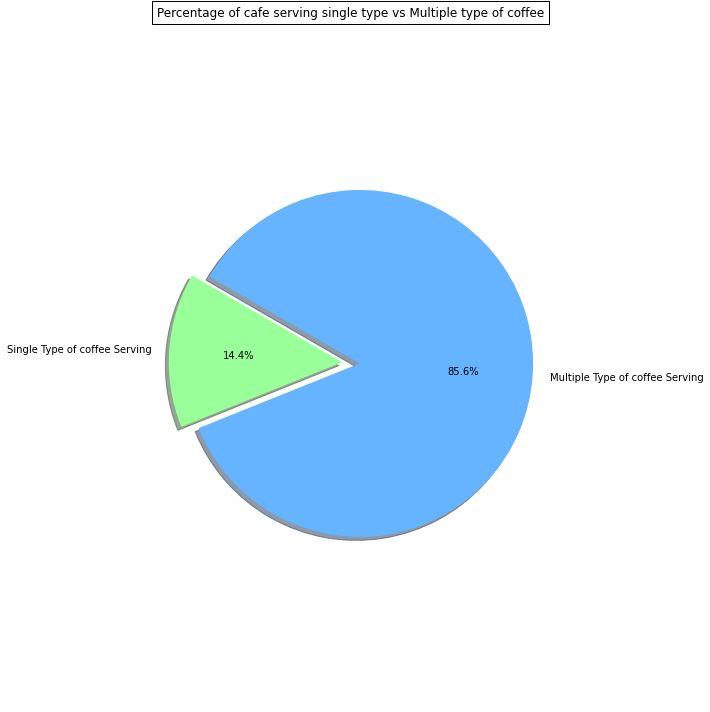

In [ ]:
# Pie chart showing Percentage of coffee serving single type vs Multiple type of Foods
labels = ['Single Type of coffee Serving', 'Multiple Type of coffee Serving', ]
sizes = [SingleTypeofcoffeeServing.shape[0], MultipleTypeofcoffeeServing.shape[0]]

explode = (0, 0.1)

colors = ['#99ff99','#66b3ff']
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
        shadow=True, startangle=150)

ax1.axis('equal')
plt.title("Percentage of cafe serving single type vs Multiple type of coffee", bbox={'facecolor':'1', 'pad':5})
fig1.set_size_inches(10,10)
plt.tight_layout()
plt.show()

#MOST LIKED DISHES IN BANGALORE

Let's store the dishes liked in seperate list and then analyse it

In [ ]:
import re
data=data[data['dish_liked'].notnull()]
data.index=range(data.shape[0])
likes=[]
for i in range(data.shape[0]):
    splited_array=re.split(',',data['dish_liked'][i])
    for item in splited_array:
        likes.append(item)

In [ ]:
print("Count of Most liked dishes of Bangalore")
favourite_food = pd.Series(likes).value_counts()
favourite_food.head(20)

Count of Most liked dishes of Bangalore


 Pasta            1246
 Burgers           781
 Sandwiches        673
 Pizza             618
Burgers            527
 Coffee            520
Coffee             444
 Sandwich          429
 Hot Chocolate     406
 Nachos            402
 Fries             367
 Pancakes          294
 Waffles           282
 Mocktails         278
 Brownie           276
 Cappuccino        251
 Tea               249
Pizza              230
Pasta              225
 Salads            217
dtype: int64

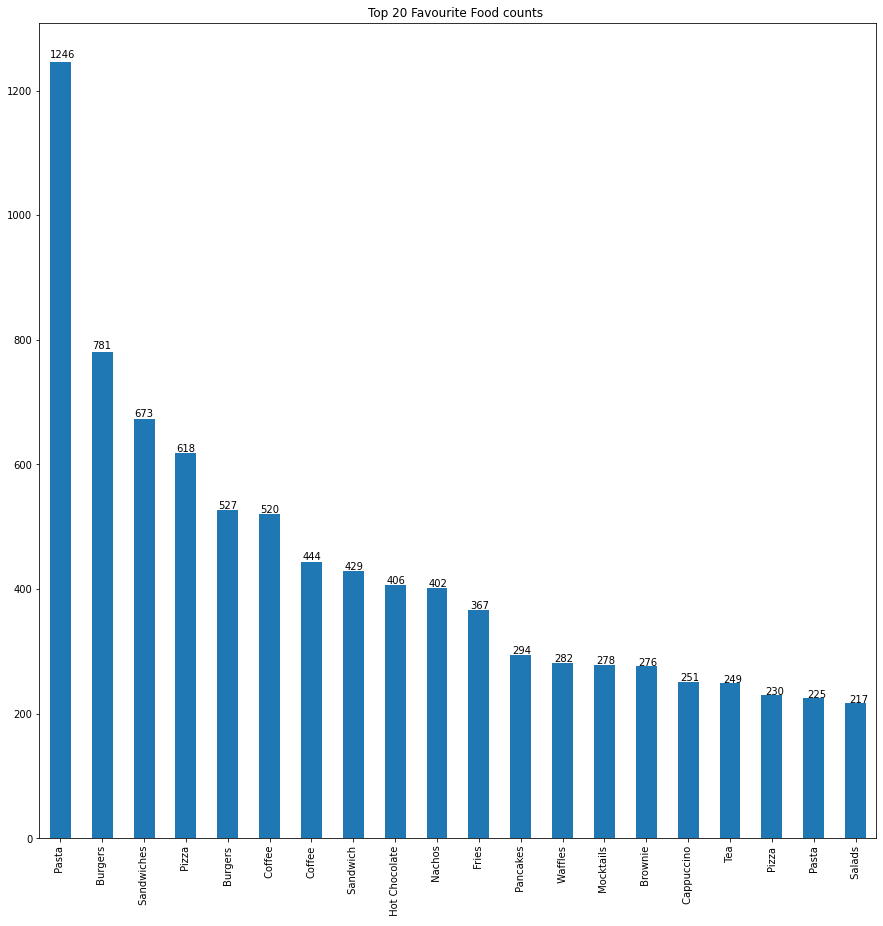

In [ ]:
ax = favourite_food.nlargest(n=20, keep='first').plot(kind='bar',figsize=(15,15),title = 'Top 20 Favourite Food counts ')

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

#ANALYSIS OF BIGGEST FOOD CHAINS OF BANGALORE

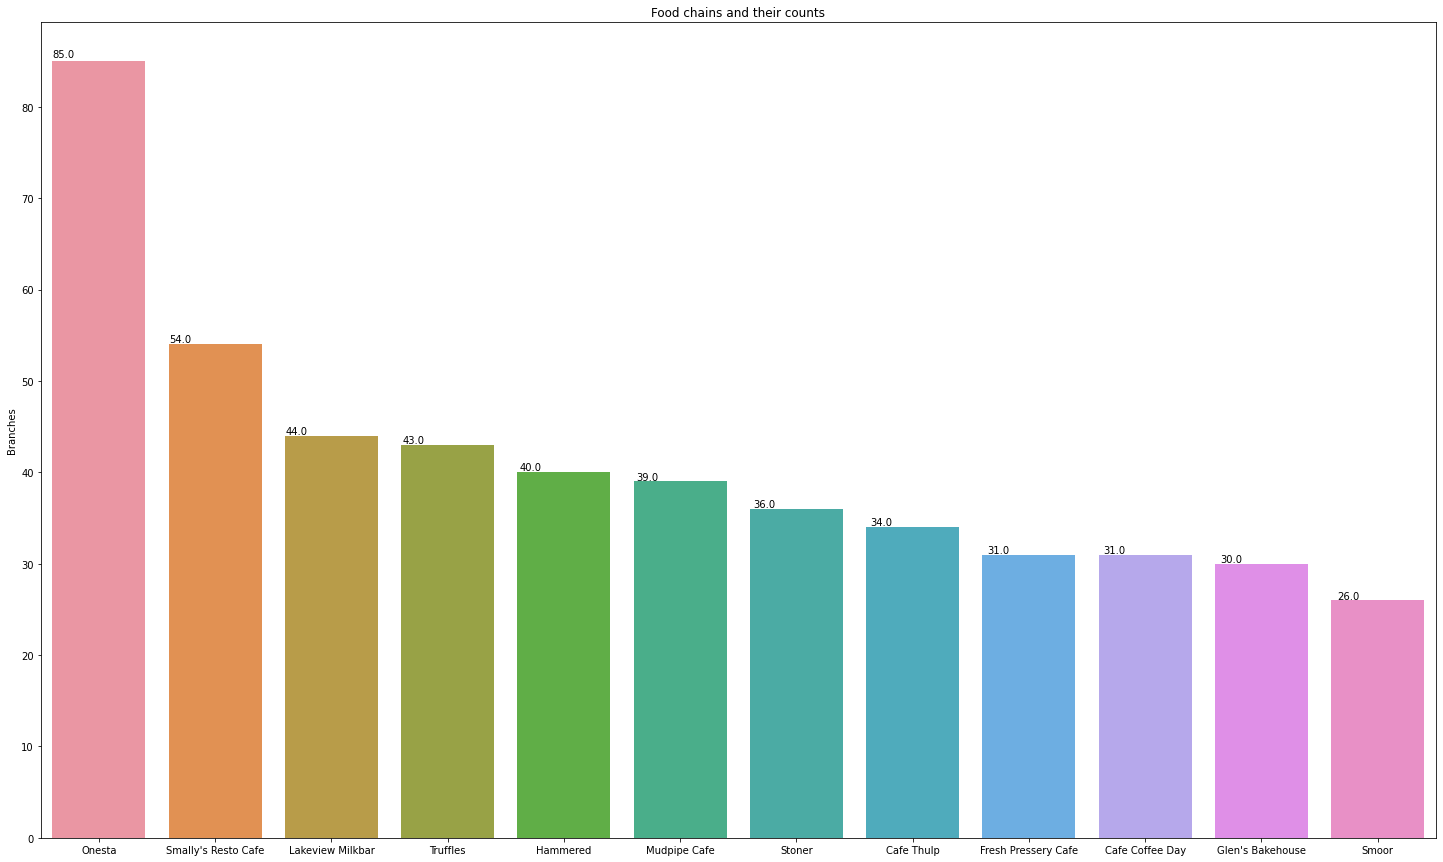

In [ ]:
branches = data.groupby(['name']).size().to_frame('count').reset_index().sort_values(['count'],ascending=False)
ax = sns.barplot(x='name', y='count', data=branches[:12])
plt.xlabel('')
plt.ylabel('Branches')
plt.title('Food chains and their counts')
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
    
fig = plt.gcf()
fig.set_size_inches(25,15)

Onesta has highest number of chains in Bangalore